In [1]:
import os
import torch
import numpy as np
import random
from utils import buildDataset

## build dataset

In [2]:
defaultStrategy = "./DefaultStrategy.txt"
defaultOutput = "./defaultOutputs.txt"
strategy = "./strategy.txt"
output = "./outputs.txt"
dataset = buildDataset.getData(strategy, output, defaultStrategy, defaultOutput)

In [3]:
len(dataset)

77

In [4]:
dataset[0]

[[{'size': 7,
   'offset': 0,
   'mazeEndIter': 3,
   'MarkerCost': 0,
   'FixedShapeCost': 8,
   'Decay': 0.95,
   'ripupMode': 0,
   'followGuide': 1},
  10178],
 [{'size': 7,
   'offset': -2,
   'mazeEndIter': 3,
   'MarkerCost': 8,
   'FixedShapeCost': 8,
   'Decay': 0.95,
   'ripupMode': 0,
   'followGuide': 1},
  569],
 [{'size': 7,
   'offset': -5,
   'mazeEndIter': 3,
   'MarkerCost': 8,
   'FixedShapeCost': 8,
   'Decay': 0.95,
   'ripupMode': 0,
   'followGuide': 1},
  499],
 [{'size': 7,
   'offset': 0,
   'mazeEndIter': 8,
   'MarkerCost': 32,
   'FixedShapeCost': 16,
   'Decay': 0.95,
   'ripupMode': 1,
   'followGuide': 0},
  1],
 [{'size': 7,
   'offset': -1,
   'mazeEndIter': 8,
   'MarkerCost': 32,
   'FixedShapeCost': 16,
   'Decay': 0.95,
   'ripupMode': 1,
   'followGuide': 0},
  0]]

# Turning datapoint to tensor

To represent a single data point input, we use a tensor of size <No_Strategy x 1 x 9>. (9 includes 8 DRC sequence items, and 1 output DRC value)

In [5]:
Dataset, Label = buildDataset.LSTMdatasetToTensor(dataset)

In [6]:
len(Dataset)

77

In [7]:
Dataset[0]

tensor([[[ 7.0000e+00,  0.0000e+00,  3.0000e+00,  0.0000e+00,  8.0000e+00,
           9.5000e-01,  0.0000e+00,  1.0000e+00,  1.0178e+04]],

        [[ 7.0000e+00, -2.0000e+00,  3.0000e+00,  8.0000e+00,  8.0000e+00,
           9.5000e-01,  0.0000e+00,  1.0000e+00,  1.0178e+04]],

        [[ 7.0000e+00, -5.0000e+00,  3.0000e+00,  8.0000e+00,  8.0000e+00,
           9.5000e-01,  0.0000e+00,  1.0000e+00,  5.6900e+02]],

        [[ 7.0000e+00,  0.0000e+00,  8.0000e+00,  3.2000e+01,  1.6000e+01,
           9.5000e-01,  1.0000e+00,  0.0000e+00,  4.9900e+02]],

        [[ 7.0000e+00, -1.0000e+00,  8.0000e+00,  3.2000e+01,  1.6000e+01,
           9.5000e-01,  1.0000e+00,  0.0000e+00,  1.0000e+00]]])

In [8]:
Dataset[0].size()

torch.Size([5, 1, 9])

In [9]:
Label[0]

tensor([[[1.0178e+04]],

        [[5.6900e+02]],

        [[4.9900e+02]],

        [[1.0000e+00]],

        [[0.0000e+00]]])

In [10]:
Label[0].size()

torch.Size([5, 1, 1])

# train-test split of the dataset

In [11]:
X_train, Y_train, X_test, Y_test = buildDataset.LSTMsplitDataset(Dataset, Label, trainSize = 0.7)

In [12]:
len(X_train)

53

In [13]:
len(X_test)

24

In [14]:
X_train[0]

tensor([[[ 7.0000e+00,  0.0000e+00,  3.0000e+00,  0.0000e+00,  8.0000e+00,
           9.5000e-01,  0.0000e+00,  1.0000e+00,  1.7047e+04]],

        [[ 7.0000e+00, -2.0000e+00,  3.0000e+00,  8.0000e+00,  8.0000e+00,
           9.5000e-01,  0.0000e+00,  1.0000e+00,  1.7047e+04]],

        [[ 7.0000e+00, -5.0000e+00,  3.0000e+00,  8.0000e+00,  8.0000e+00,
           9.5000e-01,  0.0000e+00,  1.0000e+00,  7.3570e+03]],

        [[ 7.0000e+00,  0.0000e+00,  8.0000e+00,  3.2000e+01,  1.6000e+01,
           9.5000e-01,  1.0000e+00,  0.0000e+00,  7.6540e+03]],

        [[ 7.0000e+00, -1.0000e+00,  8.0000e+00,  3.2000e+01,  1.6000e+01,
           9.5000e-01,  1.0000e+00,  0.0000e+00,  6.6800e+02]],

        [[ 7.0000e+00, -2.0000e+00,  8.0000e+00,  3.2000e+01,  1.6000e+01,
           9.5000e-01,  1.0000e+00,  0.0000e+00,  5.9000e+01]],

        [[ 7.0000e+00, -3.0000e+00,  8.0000e+00,  3.2000e+01,  1.6000e+01,
           9.5000e-01,  1.0000e+00,  0.0000e+00,  7.0000e+00]]])

In [15]:
X_train[0].size()

torch.Size([7, 1, 9])

In [16]:
Y_train[0]

tensor([[[1.7047e+04]],

        [[7.3570e+03]],

        [[7.6540e+03]],

        [[6.6800e+02]],

        [[5.9000e+01]],

        [[7.0000e+00]],

        [[0.0000e+00]]])

In [17]:
Y_train[0].size()

torch.Size([7, 1, 1])

# Creating the Network

In [18]:
# reference: https://pytorch.org/tutorials/beginner/nlp/sequence_models_tutorial.html
import torch.nn as nn

class LSTM(nn.Module):
    def __init__(self, input_size, numLayers):
        super(LSTM, self).__init__()
        self.numLayers = numLayers

        self.lstm = nn.LSTM(input_size, 1, num_layers=self.numLayers)

    def forward(self, inputData):
        output, _ = self.lstm(inputData)
        return output

In [19]:
n_input = len(X_train[0][0][0])
numLayers = 10

In [20]:
n_input

9

In [21]:
model = LSTM(n_input, numLayers)

# Run a step of the network

To run a step of this network we need to pass an input (in our case, the Tensor for the current strategy) and a previous hidden state (which we initialize as zeros at first). We’ll get back the output (probability of drcs) and a next hidden state (which we keep for the next step).

In [22]:
import torch

In [23]:
inputStrategy = X_train[0]

output = model(inputStrategy)

In [24]:
output

tensor([[[0.1773]],

        [[0.1719]],

        [[0.1654]],

        [[0.1614]],

        [[0.1595]],

        [[0.1587]],

        [[0.1584]]], grad_fn=<MkldnnRnnLayerBackward0>)

# Training

In [25]:
criterion = nn.MSELoss()

In [26]:
learning_rate = 0.001 # If you set this too high, it might explode. If too low, it might not learn

In [27]:
import torch.optim as optim
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [28]:
import time
import math

In [29]:
def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

In [30]:
n_iters = 1000
print_every = 10
plot_every = 1

In [31]:
def train(x, y):

    model.zero_grad()

    output = model(x)
    
    loss = criterion(output, y)
    loss.backward()

    optimizer.step()

    return output, loss.item()

In [32]:
# Keep track of losses for plotting
current_loss = 0
all_losses = []

In [33]:
for iter in range(1, n_iters + 1):
    # randomly generate an index in training set
    index = random.randint(0, len(X_train) - 1)
    x = X_train[index]
    y = Y_train[index]
    output, loss = train(x, y)
    current_loss += loss

    # Print ``iter`` number, loss, name and guess
    if iter % print_every == 0:
        print('%d %d%% (%s) %.4f' % (iter, iter / n_iters * 100, timeSince(start), loss))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

10 1% (0m 0s) 122993024.0000
20 2% (0m 0s) 2043350400.0000
30 3% (0m 0s) 673681792.0000
40 4% (0m 1s) 33172290.0000
50 5% (0m 1s) 122992872.0000
60 6% (0m 1s) 155520224.0000
70 7% (0m 1s) 673681088.0000
80 8% (0m 2s) 25830378.0000
90 9% (0m 2s) 30635764.0000
100 10% (0m 2s) 360201.1562
110 11% (0m 3s) 33172146.0000
120 12% (0m 3s) 155519760.0000
130 13% (0m 3s) 15347.4746
140 14% (0m 3s) 20831724.0000
150 15% (0m 4s) 6812209.5000
160 16% (0m 4s) 30635510.0000
170 17% (0m 4s) 10815.8496
180 18% (0m 5s) 30635430.0000
190 19% (0m 5s) 243367808.0000
200 20% (0m 5s) 328327.3438
210 21% (0m 6s) 6812084.5000
220 22% (0m 6s) 15338.9717
230 23% (0m 7s) 29062048.0000
240 24% (0m 7s) 104032264.0000
250 25% (0m 8s) 360161.5625
260 26% (0m 8s) 155518160.0000
270 27% (0m 8s) 338665792.0000
280 28% (0m 9s) 1150967936.0000
290 28% (0m 9s) 216975872.0000
300 30% (0m 9s) 2979870976.0000
310 31% (0m 10s) 2043341440.0000
320 32% (0m 10s) 125867320.0000
330 33% (0m 10s) 155517456.0000
340 34% (0m 11s) 1282

# Result evaluation

In [34]:
# print("MSE: %.2f" % best_mse)
# print("RMSE: %.2f" % np.sqrt(best_mse))
# plt.plot(history)
# plt.show()

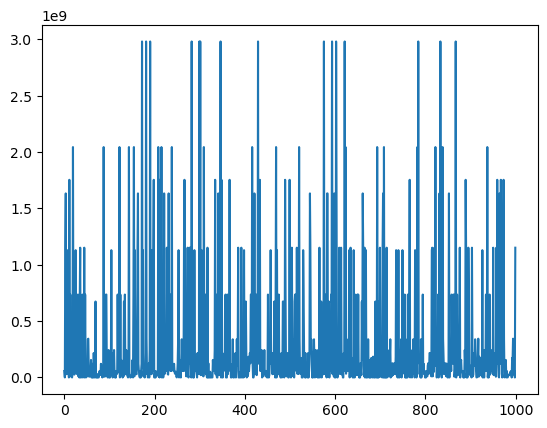

In [35]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

In [36]:
all_losses

[57655816.0,
 360223.75,
 1150973440.0,
 1632429952.0,
 57655800.0,
 29062854.0,
 1129055872.0,
 122993032.0,
 125870048.0,
 122993024.0,
 328416.875,
 1753090048.0,
 155520752.0,
 735413952.0,
 121280944.0,
 6812443.5,
 20749264.0,
 328412.90625,
 30635988.0,
 2043350400.0,
 184565296.0,
 57678084.0,
 25830570.0,
 57678080.0,
 121280856.0,
 1129055616.0,
 216978256.0,
 33172332.0,
 30635946.0,
 673681792.0,
 735413568.0,
 9914938.0,
 121280792.0,
 10824.0791015625,
 673681536.0,
 1150972672.0,
 47681.07421875,
 10823.771484375,
 57677960.0,
 33172290.0,
 735413312.0,
 10823.49609375,
 33172282.0,
 155520384.0,
 1150972544.0,
 15353.4921875,
 735413184.0,
 57655564.0,
 757113.25,
 122992872.0,
 33172258.0,
 9914893.0,
 338666560.0,
 343958240.0,
 57655532.0,
 6812361.5,
 33172250.0,
 57052344.0,
 57655520.0,
 155520224.0,
 757103.8125,
 57052332.0,
 6723.17333984375,
 121280600.0,
 12842.583984375,
 216977920.0,
 50703688.0,
 15351.919921875,
 57052312.0,
 673681088.0,
 360206.5625,
 1

# Running one unseen inputs

In [37]:
# Just return an output given an input
def evaluate(x):
    
    output = model(x)

    return output

In [38]:
def predict(x):
    with torch.no_grad():
        output = evaluate(x)
    return output

In [39]:
results = []
for index in range(len(X_test)):
    x = X_test[index]
    output = predict(x)
    results.append(output)

In [40]:
results[0]

tensor([[[0.5880]],

        [[0.7864]],

        [[0.8587]],

        [[0.8895]],

        [[0.9044]]])